## Imports

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math
import ast
%matplotlib  inline

# Import Dataset

In [2]:
df = pd.read_csv('../raw_data/kaggle_data_merged_with_labels.csv')

In [3]:
df.head()

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y
0,2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","['Skiing', 'Ice Hockey', 'Biathlon', 'Skating'...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
1,3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","['Cross Country Skiing', 'Ice Hockey', 'Nordic...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
2,4,the-guardian/olympic-games,winter.csv,Athlete,other,"PORTER, John Chester, WILKES, Debbi, BELLAMY, ...","['PORTER, John Chester', 'WILKES, Debbi', 'BEL...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other
3,7,the-guardian/olympic-games,winter.csv,Event,cat-multi,"Ice Hockey, 4X10KM Relay, Ice Hockey, Pairs, 4...","['Ice Hockey', '4X10KM Relay', 'Pairs', 'Slalo...",73,"{'Ice Hockey': 254, '4X10KM Relay': 52, '4X7.5...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
4,8,the-guardian/olympic-games,winter.csv,Medal,cat-multi,"Silver, Bronze, Bronze, Gold, Bronze, Silver, ...","['Silver', 'Bronze', 'Gold']",3,"{'Gold': 335, 'Bronze': 334, 'Silver': 331}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1482 non-null   int64  
 1   dataset_name          1482 non-null   object 
 2   table_name            1482 non-null   object 
 3   column_name           1482 non-null   object 
 4   label                 1482 non-null   object 
 5   column_values         1482 non-null   object 
 6   column_values_unique  1482 non-null   object 
 7   n_unique_values       1482 non-null   int64  
 8   unique_value_counts   1482 non-null   object 
 9   n_values              1482 non-null   int64  
 10  mean                  532 non-null    float64
 11  std                   532 non-null    float64
 12  median                532 non-null    float64
 13  skew                  532 non-null    float64
 14  kurt                  532 non-null    float64
 15  shapiro_wilk_test    

In [5]:
df.label.unique()

array(['cat-multi', 'other', 'cat-binary', 'float', 'int', 'date', 'text'],
      dtype=object)

In [6]:
df.loc[df.label == 'date']

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y
43,194,kaggle/sf-salaries,Salaries.csv,Year,date,"2013, 2014, 2013, 2011, 2013, 2011, 2013, 2012...","[2013, 2014, 2011, 2012]",4,"{'2014': 259, '2012': 254, '2011': 249, '2013'...",1000,2012.507,1.125708,2012.0,0.003631,-1.377314,1.943819e-29,date
141,477,new-york-city/nyc-property-sales,nyc-rolling-sales.csv,SALE DATE,date,"2017-02-17 00:00:00, 2017-01-12 00:00:00, 2016...","['2017-02-17 00:00:00', '2017-01-12 00:00:00',...",250,"{'2017-01-27 00:00:00': 13, '2016-09-15 00:00:...",1000,NaN,NaN,NaN,NaN,NaN,NaN,date
142,481,shivamb/company-acquisitions-7-top-companies,acquisitions_update_2021.csv,Acquisition Month,date,"Jul, Dec, Mar, May, Sep, Jul, Apr, May, Jul, M...","['Jul', 'Dec', 'Mar', 'May', 'Sep', 'Apr', 'Ju...",13,"{'May': 94, 'Jun': 92, 'Apr': 89, 'Jul': 88, '...",1000,NaN,NaN,NaN,NaN,NaN,NaN,date
244,931,fireballbyedimyrnmom/us-counties-covid-19-dataset,us-counties.csv,date,date,"2021-08-03, 2020-12-30, 2021-03-27, 2020-07-01...","['2021-08-03', '2020-12-30', '2021-03-27', '20...",490,"{'2020-08-31': 8, '2021-09-04': 7, '2020-10-12...",1000,NaN,NaN,NaN,NaN,NaN,NaN,date
345,1615,cjgdev/formula-1-race-data-19502017,qualifying.csv,q1,date,"1:28.918, 1:34.425, 2:02.827, 1:24.778, 1:16.1...","['1:28.918', '1:34.425', '2:02.827', '1:24.778...",970,"{'1:37.006': 2, '1:26.740': 2, '1:34.293': 2, ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,date
379,1708,utkarshxy/who-worldhealth-statistics-2020-comp...,30-70cancerChdEtc.csv,Period,date,"2010, 2010, 2000, 2015, 2005, 2010, 2000, 2015...","[2010, 2000, 2015, 2005, 2016]",5,"{'2016': 208, '2000': 200, '2005': 200, '2010'...",1000,2009.218,6.063270,2010.0,-0.311305,-1.396420,1.361972e-30,date
385,1722,utkarshxy/who-worldhealth-statistics-2020-comp...,mortalityRateUnsafeWash.csv,Period,date,"2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016...",[2016],1,{'2016': 549},549,2016.000,0.000000,2016.0,0.000000,0.000000,1.000000e+00,date
395,1739,utkarshxy/who-worldhealth-statistics-2020-comp...,hepatitusBsurfaceAntigen.csv,Period,date,"2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015...",[2015],1,{'2015': 194},194,2015.000,0.000000,2015.0,0.000000,0.000000,1.000000e+00,date
422,1819,utkarshxy/who-worldhealth-statistics-2020-comp...,newHivInfections.csv,Period,date,"2019, 2010, 2015, 2000, 2015, 2010, 2000, 2015...","[2019, 2010, 2015, 2000, 2005]",5,"{'2010': 211, '2005': 200, '2019': 199, '2015'...",1000,2009.846,6.735403,2010.0,-0.089819,-1.315775,1.535718e-26,date
460,4299,agirlcoding/all-space-missions-from-1957,Space_Corrected.csv,Datum,date,"Wed Jun 22, 1983 23:58 UTC, Wed Apr 02, 1975 1...","['Wed Jun 22, 1983 23:58 UTC', 'Wed Apr 02, 19...",1000,"{'Wed Jun 22, 1983 23:58 UTC': 1, 'Sun Sep 09,...",1000,NaN,NaN,NaN,NaN,NaN,NaN,date


## cat-binary test

Testing if the column has more than 2 unique values. If the values are numbers, verify if they are 0 and 1.

In [7]:
for index,row in df.iterrows():
    if row['n_unique_values'] == 2:
        list_n_uniques = ast.literal_eval(row.column_values_unique)
        if all(isinstance(item, int) for item in list_n_uniques):
            test_bin_num = set(list_n_uniques)
            if set([0, 1]).issubset(test_bin_num):
                df.loc[index,'heuristic_label'] = 'cat-binary'
        else:
            df.loc[index,'heuristic_label'] = 'cat-binary'
            

        

In [8]:
df.loc[df['n_unique_values'] == 2]

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y,heuristic_label
8,15,the-guardian/olympic-games,summer.csv,Gender,cat-binary,"Women, Men, Men, Men, Men, Men, Men, Women, Wo...","['Women', 'Men']",2,"{'Men': 713, 'Women': 287}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-binary,cat-binary
22,96,kimjihoo/coronavirusdataset,PatientInfo.csv,sex,cat-binary,"nan, male, nan, male, nan, female, female, fem...","[None, 'male', 'female']",2,"{'female': 439, 'male': 349}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-binary,cat-binary
29,123,kimjihoo/coronavirusdataset,TimeGender.csv,sex,cat-binary,"male, female, male, female, male, female, male...","['male', 'female']",2,"{'male': 121, 'female': 121}",242,NaN,NaN,NaN,NaN,NaN,NaN,cat-binary,cat-binary
35,136,kimjihoo/coronavirusdataset,Case.csv,group,cat-binary,"True, True, True, True, True, True, True, True...","[True, False]",2,"{'True': 124, 'False': 50}",174,7.126437e-01,4.538352e-01,1.0,-0.947993,-1.114251,1.160420e-20,cat-binary,cat-binary
49,208,ramjidoolla/ipl-data-set,matches.csv,toss_decision,cat-binary,"field, field, field, field, bat, field, field,...","['field', 'bat']",2,"{'field': 463, 'bat': 293}",756,NaN,NaN,NaN,NaN,NaN,NaN,cat-binary,cat-binary
65,243,ramjidoolla/ipl-data-set,deliveries.csv,bye_runs,int,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 1]",2,"{'0': 999, '1': 1}",1000,1.000000e-03,3.162278e-02,0.0,31.622777,1000.000000,0.000000e+00,int,cat-binary
86,301,kaggle/kaggle-survey-2017,freeformResponses.csv,LearningPlatformFreeForm3,text,"nan, nan, nan, nan, nan, nan, nan, nan, nan, n...","[None, 'Meetups', 'Other']",2,"{'Meetups': 1, 'Other': 1}",1000,NaN,NaN,NaN,NaN,NaN,NaN,text,cat-binary
87,303,kaggle/kaggle-survey-2017,freeformResponses.csv,LearningPlatformUsefulnessFreeForm1Select,text,"nan, nan, nan, nan, nan, nan, nan, nan, nan, n...","[None, 'Very useful', 'Somewhat useful']",2,"{'Very useful': 18, 'Somewhat useful': 5}",1000,NaN,NaN,NaN,NaN,NaN,NaN,text,cat-binary
135,441,szamil/who-suicide-statistics,who_suicide_statistics.csv,sex,cat-binary,"female, male, female, male, female, male, fema...","['female', 'male']",2,"{'female': 502, 'male': 498}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-binary,cat-binary
137,446,uciml/indian-liver-patient-records,indian_liver_patient.csv,Gender,cat-binary,"Female, Male, Male, Male, Male, Male, Female, ...","['Female', 'Male']",2,"{'Male': 441, 'Female': 142}",583,NaN,NaN,NaN,NaN,NaN,NaN,cat-binary,cat-binary


## Date test

In [9]:
pattern = r'([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01]))|((0?[13578]|10|12)(-|\/)(([1-9])|(0[1-9])|([12])([0-9]?)|(3[01]?))(-|\/)((19)([2-9])(\d{1})|(20)([01])(\d{1})|([8901])(\d{1}))|(0?[2469]|11)(-|\/)(([1-9])|(0[1-9])|([12])([0-9]?)|(3[0]?))(-|\/)((19)([2-9])(\d{1})|(20)([01])(\d{1})|([8901])(\d{1})))'
for index,row in df.iterrows():
    if 'date' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'date'
    elif 'period' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'date'
        print(row.column_values_unique)
    elif 'year' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'date'
        print(row.column_values_unique)
    elif re.search(pattern,str(row.column_values_unique)):
        print('regex')
        df.loc[index,'heuristic_label'] = 'date'

[2013, 2014, 2011, 2012]
[None, 'Reinforcement Learning', 'GANs', 'Automatic Speech Recognition', 'Reinforcement learning', 'deep learning', 'Q Learning', 'GAN', 'Learn for job, not for excitement', 'reinforcement learning', 'Artificial intelligence', 'Adversarial learning', 'Reinforcement Learning ', 'AI', 'Factorization Machines', 'RNN']
regex
regex
regex
regex
regex
regex
regex
regex
regex
regex
[2010, 2000, 2015, 2005, 2016]
[2016]
[2015]
[2019, 2010, 2015, 2000, 2005]
regex
regex


In [10]:
df.loc[df.heuristic_label.isnull()]

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y,heuristic_label
0,2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","['Skiing', 'Ice Hockey', 'Biathlon', 'Skating'...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1,3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","['Cross Country Skiing', 'Ice Hockey', 'Nordic...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
2,4,the-guardian/olympic-games,winter.csv,Athlete,other,"PORTER, John Chester, WILKES, Debbi, BELLAMY, ...","['PORTER, John Chester', 'WILKES, Debbi', 'BEL...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN
3,7,the-guardian/olympic-games,winter.csv,Event,cat-multi,"Ice Hockey, 4X10KM Relay, Ice Hockey, Pairs, 4...","['Ice Hockey', '4X10KM Relay', 'Pairs', 'Slalo...",73,"{'Ice Hockey': 254, '4X10KM Relay': 52, '4X7.5...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
4,8,the-guardian/olympic-games,winter.csv,Medal,cat-multi,"Silver, Bronze, Bronze, Gold, Bronze, Silver, ...","['Silver', 'Bronze', 'Gold']",3,"{'Gold': 335, 'Bronze': 334, 'Silver': 331}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,21361,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,BLK,int,"7, 2, 2, 13, 28, 6, 0, 4, 23, 20, 31, 6, 2, 19...","[7, 2, 13, 28, 6, 0, 4, 23, 20, 31, 19, 18, 83...",73,"{'0': 136, '1': 122, '2': 88, '3': 76, '4': 65...",1000,10.72,18.58976,5.0,5.088356,38.562032,2.802597e-45,int,NaN
1478,21364,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,birth_month,cat-multi,"Nov, Nov, Sep, Nov, Mar, Oct, May, Dec, Dec, A...","['Nov', 'Sep', 'Mar', 'Oct', 'May', 'Dec', 'Au...",12,"{'Mar': 111, 'Aug': 98, 'Jun': 89, 'Oct': 84, ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1479,21370,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,nationality,cat-multi,"France, United States, United States, Switzerl...","['France', 'United States', 'Switzerland', 'No...",112,"{'United States': 350, 'Serbia': 49, 'Spain': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1480,21371,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,high_school,cat-multi,"nan, nan, Middleburg Academy, nan, nan, nan, n...","[None, 'Middleburg Academy', 'McEachern High S...",348,"{'Oak Hill Academy': 7, 'Leuzinger High School...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN


In [11]:
df

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y,heuristic_label
0,2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","['Skiing', 'Ice Hockey', 'Biathlon', 'Skating'...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1,3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","['Cross Country Skiing', 'Ice Hockey', 'Nordic...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
2,4,the-guardian/olympic-games,winter.csv,Athlete,other,"PORTER, John Chester, WILKES, Debbi, BELLAMY, ...","['PORTER, John Chester', 'WILKES, Debbi', 'BEL...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN
3,7,the-guardian/olympic-games,winter.csv,Event,cat-multi,"Ice Hockey, 4X10KM Relay, Ice Hockey, Pairs, 4...","['Ice Hockey', '4X10KM Relay', 'Pairs', 'Slalo...",73,"{'Ice Hockey': 254, '4X10KM Relay': 52, '4X7.5...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
4,8,the-guardian/olympic-games,winter.csv,Medal,cat-multi,"Silver, Bronze, Bronze, Gold, Bronze, Silver, ...","['Silver', 'Bronze', 'Gold']",3,"{'Gold': 335, 'Bronze': 334, 'Silver': 331}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,21361,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,BLK,int,"7, 2, 2, 13, 28, 6, 0, 4, 23, 20, 31, 6, 2, 19...","[7, 2, 13, 28, 6, 0, 4, 23, 20, 31, 19, 18, 83...",73,"{'0': 136, '1': 122, '2': 88, '3': 76, '4': 65...",1000,10.72,18.58976,5.0,5.088356,38.562032,2.802597e-45,int,NaN
1478,21364,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,birth_month,cat-multi,"Nov, Nov, Sep, Nov, Mar, Oct, May, Dec, Dec, A...","['Nov', 'Sep', 'Mar', 'Oct', 'May', 'Dec', 'Au...",12,"{'Mar': 111, 'Aug': 98, 'Jun': 89, 'Oct': 84, ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1479,21370,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,nationality,cat-multi,"France, United States, United States, Switzerl...","['France', 'United States', 'Switzerland', 'No...",112,"{'United States': 350, 'Serbia': 49, 'Spain': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1480,21371,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,high_school,cat-multi,"nan, nan, Middleburg Academy, nan, nan, nan, n...","[None, 'Middleburg Academy', 'McEachern High S...",348,"{'Oak Hill Academy': 7, 'Leuzinger High School...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN


## Cat-multi test

(array([175.,  37.,   6.,   5.,   2.,   0.,   4.,   2.,   0.,  37.]),
 array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
        0.8002, 0.9001, 1.    ]),
 <BarContainer object of 10 artists>)

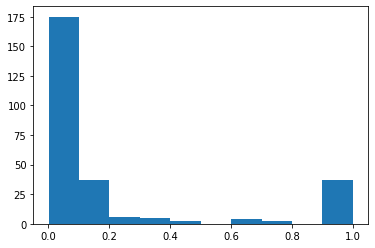

In [33]:
df_cat_multi = df.loc[df.label == 'cat-multi']
plt.hist(df_cat_multi.n_unique_values/df_cat_multi.n_values)

(array([192.,  11.,  44.,   5.,   2.,  10.,   0.,   0.,   0.,   4.]),
 array([  1. ,  69.6, 138.2, 206.8, 275.4, 344. , 412.6, 481.2, 549.8,
        618.4, 687. ]),
 <BarContainer object of 10 artists>)

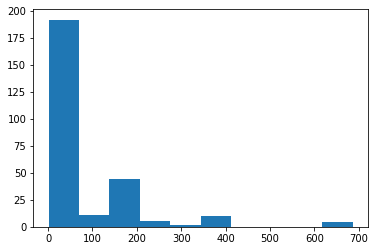

In [31]:
plt.hist(df_cat_multi.n_unique_values)

In [32]:
df_cat_multi.head(20)

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y,heuristic_label
0,2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","['Skiing', 'Ice Hockey', 'Biathlon', 'Skating'...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
1,3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","['Cross Country Skiing', 'Ice Hockey', 'Nordic...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
3,7,the-guardian/olympic-games,winter.csv,Event,cat-multi,"Ice Hockey, 4X10KM Relay, Ice Hockey, Pairs, 4...","['Ice Hockey', '4X10KM Relay', 'Pairs', 'Slalo...",73,"{'Ice Hockey': 254, '4X10KM Relay': 52, '4X7.5...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
4,8,the-guardian/olympic-games,winter.csv,Medal,cat-multi,"Silver, Bronze, Bronze, Gold, Bronze, Silver, ...","['Silver', 'Bronze', 'Gold']",3,"{'Gold': 335, 'Bronze': 334, 'Silver': 331}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
5,11,the-guardian/olympic-games,summer.csv,Sport,cat-multi,"Aquatics, Football, Cycling, Football, Sailing...","['Aquatics', 'Football', 'Cycling', 'Sailing',...",35,"{'Aquatics': 115, 'Athletics': 108, 'Rowing': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
6,12,the-guardian/olympic-games,summer.csv,Discipline,cat-multi,"Swimming, Fencing, Cycling Road, Diving, Rowin...","['Swimming', 'Fencing', 'Cycling Road', 'Divin...",55,"{'Athletics': 116, 'Rowing': 72, 'Swimming': 7...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
9,17,the-guardian/olympic-games,summer.csv,Medal,cat-multi,"Silver, Bronze, Silver, Bronze, Gold, Silver, ...","['Silver', 'Bronze', 'Gold']",3,"{'Bronze': 356, 'Silver': 336, 'Gold': 308}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
10,18,the-guardian/olympic-games,dictionary.csv,Country,cat-multi,"Afghanistan, Albania, Algeria, American Samoa*...","['Afghanistan', 'Albania', 'Algeria', 'America...",201,"{'Afghanistan': 1, 'Palau': 1, 'Nepal': 1, 'Ne...",201,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
17,66,kimjihoo/coronavirusdataset,SeoulFloating.csv,province,cat-multi,"Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seou...",['Seoul'],1,{'Seoul': 1000},1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
18,67,kimjihoo/coronavirusdataset,SeoulFloating.csv,city,cat-multi,"Yeongdeungpo-gu, Jongno-gu, Nowon-gu, Yongsan-...","['Yeongdeungpo-gu', 'Jongno-gu', 'Nowon-gu', '...",25,"{'Nowon-gu': 54, 'Songpa-gu': 53, 'Dobong-gu':...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN


In [34]:
for index,row in df.iterrows():
    if 'province' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'region' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'  
    elif 'country' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'category' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'state' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'city' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'day' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'week' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif 'location' in row['column_name'].lower():
        df.loc[index,'heuristic_label'] = 'cat-multi'
    elif (row.n_unique_values/row.n_values) < 0.05 and row.n_unique_values < 10:
        df.loc[index,'heuristic_label'] = 'cat-multi'

In [35]:
df.loc[df.label == 'cat-multi'].head()

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y,heuristic_label
0,2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","['Skiing', 'Ice Hockey', 'Biathlon', 'Skating'...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,cat-multi
1,3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","['Cross Country Skiing', 'Ice Hockey', 'Nordic...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
3,7,the-guardian/olympic-games,winter.csv,Event,cat-multi,"Ice Hockey, 4X10KM Relay, Ice Hockey, Pairs, 4...","['Ice Hockey', '4X10KM Relay', 'Pairs', 'Slalo...",73,"{'Ice Hockey': 254, '4X10KM Relay': 52, '4X7.5...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN
4,8,the-guardian/olympic-games,winter.csv,Medal,cat-multi,"Silver, Bronze, Bronze, Gold, Bronze, Silver, ...","['Silver', 'Bronze', 'Gold']",3,"{'Gold': 335, 'Bronze': 334, 'Silver': 331}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,cat-multi
5,11,the-guardian/olympic-games,summer.csv,Sport,cat-multi,"Aquatics, Football, Cycling, Football, Sailing...","['Aquatics', 'Football', 'Cycling', 'Sailing',...",35,"{'Aquatics': 115, 'Athletics': 108, 'Rowing': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,NaN


## Text test

In [ ]:
df_text = df.loc[df.label == 'text']
df_text

In [20]:
for index,row in df.iterrows():
    if math.isnan(row['mean']) and math.isnan(row['std']) and math.isnan(row['median']) and math.isnan(row['skew']) and math.isnan(row['kurt']) and (row.n_unique_values/row.n_values) > 0.8 :
        df.loc[index,'heuristic_label'] = 'text'

In [21]:
df.loc[df.heuristic_label == 'text']

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y,heuristic_label
2,4,the-guardian/olympic-games,winter.csv,Athlete,other,"PORTER, John Chester, WILKES, Debbi, BELLAMY, ...","['PORTER, John Chester', 'WILKES, Debbi', 'BEL...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,text
7,13,the-guardian/olympic-games,summer.csv,Athlete,other,"GARAPICK, Nancy Ellen, RODRIGUEZ VILLANUEVA, E...","['GARAPICK, Nancy Ellen', 'RODRIGUEZ VILLANUEV...",982,"{'ASTAKHOVA, Polina': 2, 'KOKKINEN, Väinö Anse...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,text
10,18,the-guardian/olympic-games,dictionary.csv,Country,cat-multi,"Afghanistan, Albania, Algeria, American Samoa*...","['Afghanistan', 'Albania', 'Algeria', 'America...",201,"{'Afghanistan': 1, 'Palau': 1, 'Nepal': 1, 'Ne...",201,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,text
39,174,PromptCloudHQ/imdb-data,IMDB-Movie-Data.csv,Title,other,"Saving Mr. Banks, Harry Potter and the Order o...","['Saving Mr. Banks', 'Harry Potter and the Ord...",999,"{'The Host': 2, 'Saving Mr. Banks': 1, 'The Hu...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,text
40,176,PromptCloudHQ/imdb-data,IMDB-Movie-Data.csv,Description,other,When human forces discover the existence of th...,['When human forces discover the existence of ...,1000,{'When human forces discover the existence of ...,1000,NaN,NaN,NaN,NaN,NaN,NaN,other,text
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,18307,rtatman/lego-database,colors.csv,name,cat-multi,"Unknown, Black, Blue, Green, Dark Turquoise, R...","['Unknown', 'Black', 'Blue', 'Green', 'Dark Tu...",135,"{'Unknown': 1, 'Metal Blue': 1, 'Bright Light ...",135,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi,text
1316,18310,rtatman/lego-database,sets.csv,set_num,other,"60127-1, 8791-1, 911611-1, 8017-1, 2847-1, 850...","['60127-1', '8791-1', '911611-1', '8017-1', '2...",1000,"{'60127-1': 1, '5191-1': 1, '30120-1': 1, '512...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,text
1317,18311,rtatman/lego-database,sets.csv,name,other,"Spider-Man: Doc Ock's Tentacle Trap, Girl's Fr...","[""Spider-Man: Doc Ock's Tentacle Trap"", ""Girl'...",979,"{'Basic Building Set': 4, 'Police Car': 3, 'He...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other,text
1363,18495,mabusalah/brent-oil-prices,BrentOilPrices.csv,Date,date,"19-Aug-93, 17-Dec-90, 6-Jan-17, 17-May-00, 11-...","['19-Aug-93', '17-Dec-90', '6-Jan-17', '17-May...",1000,"{'19-Aug-93': 1, '15-Oct-90': 1, '28-Feb-14': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,date,text


## INT FLOAT test

In [30]:
for index,row in df.iterrows():
    if math.isnan(row['mean'])==False and math.isnan(row['std'])==False and math.isnan(row['median'])==False and math.isnan(row['skew'])==False and math.isnan(row['kurt'])==False and (row.n_unique_values/row.n_values) > 0.8:
        list_n_uniques = ast.literal_eval(row.column_values_unique)
        if all(isinstance(item, int) for item in list_n_uniques):
            df.loc[index,'heuristic_label'] = 'int'
        elif all(isinstance(item, float) for item in list_n_uniques):
            df.loc[index,'heuristic_label'] = 'float'